# Assessment Outline:



You have been retained by a retail company to analyse a dataset based on video games. This analysis will help determine the sales strategy for the company in their upcoming Winter season.    
Each answer MUST have a separate and different visualization that can be easily understood, visually represents the answer, and all data wrangling, analysis, and visualizations must be generated using python(No EXCEL or Similar Technologies)  
The companies CTO also requires you to rationalize all the decisions that you have made in Poster that displays your visualizations.    
This rationalization MUST include your visualization design decisions for your visualizations, feature selection and any other information that you deem relevant.   

<br>

You are required to use the dataset contained within the file “vgsales.csv” and then answer the following questions using a different visualization type (eg. Bar Chart, Scatter graph etc…) for each question:

<br>

*	What are the top 5 games by global sales?   
*	What is the distribution of the most popular 4 game genres?  
*	Do older games (2005 and earlier) have a higher MEAN “eu_sales” than newer games (after 2005)?  
*	What are the 3 most common “developer” in the dataset?  

<br>

Your project must incorporate the following elements:


A Jupyter Notebook detailing your:
*	EDA process
*	Data Cleaning
*	Feature Selection
*	Data Visualizations

# Assessment

## Exploratory Data Analysis

### Part One: Overview & Structure

#### Import Libraries & DataSet

In [36]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
import warnings
warnings.filterwarnings('ignore')

# Show plots inside notebook
%matplotlib inline

# Style
sns.set(style="whitegrid")

# Calculate means for visualisation
from numpy import mean

I import the essential Python libraries for data handling and visualization.

* `pandas` and `numpy` will help me explore the data structurally.

* `matplotlib` and `seaborn` will allow me to create visual summaries.

* `%matplotlib inline` to show plots within the notebook.

This setup is standard for performing EDA tasks in line with Ahmed (2025a).

In [37]:
# Load the dataset
vgsales = pd.read_csv('vgsales.csv')

#### View sample records

*   Preview first 5 rows of the dataset
*   Display column types, non-null counts, and memory usage
*   Get summary statistics for numerical columns

In [38]:
vgsales.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
vgsales.tail()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16718,Winning Post 8 2016,PSV,2016.0,Simulation,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN


**Why?**

Viewing the top and bottom of the dataset gives me a sense of how the data looks. It helps spot inconsistencies, entry errors, or formatting issues early on

#### Inspect Data Types

In [40]:
vgsales.dtypes

,0
Name,object
Platform,object
Year_of_Release,float64
Genre,object
Publisher,object
NA_Sales,float64
EU_Sales,float64
JP_Sales,float64
Other_Sales,float64
Global_Sales,float64


**Why?**

I use `.dtypes` to check what types each column. This is imprtant because sometimes the data can be misread. For example sometimes numbers are read as text abd dates might be recognised correctly. It helps catch these issues before cleaning the data (Ahmed, 2024a).

#### Dataset Summary Information

In [41]:
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


**Why?**

I also use `.info()` right after to see the number of non-null values, data types, and memory usage. It gives a clearer picture of the dataset's structure and helps spot any missing values (Ahmed, 2024a).

#### Dataset Shape

In [42]:
print("Rows and columns in the dataset:", vgsales.shape)

Rows and columns in the dataset: (16719, 16)


**Why?**

I check the size of the dataset using `.shape` to inderstand how big it is. A small dataset might not need that much complex analysis, but a large one could need a lot more detailed work.

#### Summary Statistics

In [43]:
vgsales.describe(include='all')

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
count,16717,16719,16450.000000,16717,16665,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,10015,7590.000000,10096,9950
unique,11562,31,NaN,12,581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96,NaN,1696,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tbd,NaN,Ubisoft,E
freq,12,2161,NaN,3370,1356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2425,NaN,204,3991
mean,NaN,NaN,2006.487356,NaN,NaN,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,NaN,162.229908,NaN,NaN
std,NaN,NaN,5.878995,NaN,NaN,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,NaN,561.282326,NaN,NaN
min,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,NaN,4.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,NaN,10.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,NaN,24.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,NaN,81.000000,NaN,NaN


**Why?**
I use `.describe(include='all')` to get summary information for all columns. This shows me things like counts for categories, min/max values, and averages for numbers. It helps me see how the data is spread out, spot outliers, and find any issues (Ahmed, 2024a).


#### Checking for Missing Values

In [44]:
print("Missing values in each column:")
vgsales.isnull().sum()

Missing values in each column:


,0
Name,2
Platform,0
Year_of_Release,269
Genre,2
Publisher,54
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0
Global_Sales,0


**Why?**

Finding missing values now rather than later is important. This is because I can decide whether I should fill them in, remove them, or mark them during cleaning. Knowing how many are missing helps me plan what to do next (Ahmed, 2024a).

#### Checking for Duplicates

In [45]:
duplicates = vgsales[vgsales.duplicated()]
print(f"Number of duplicate rows: {duplicates.shape[0]}")

Number of duplicate rows: 0


**Why?**

Duplicate entries can mess up the results of summaries and models. Doing this just checks if there are any without removing anything yet

### Part Two: Visual Analysis

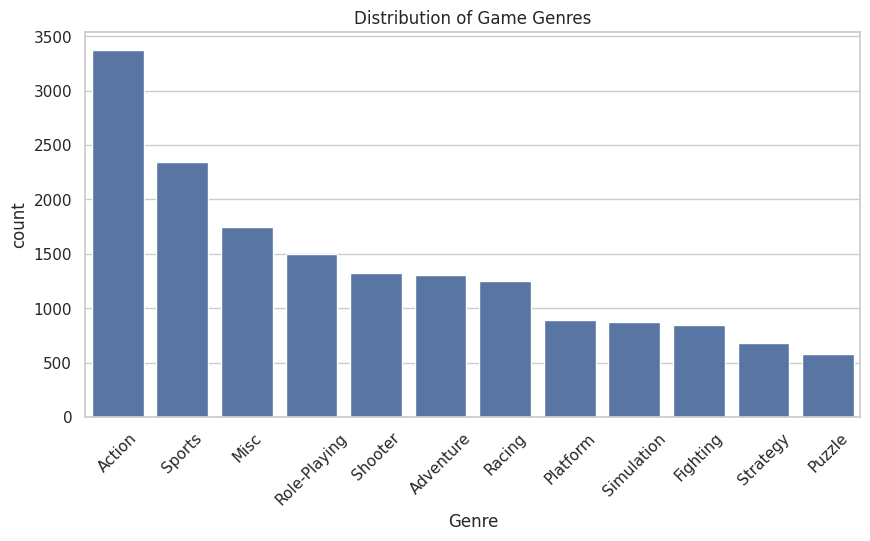

In [46]:
plt.figure(figsize=(10,5))
sns.countplot(data=vgsales, x='Genre', order=vgsales['Genre'].value_counts().index)
plt.title('Distribution of Game Genres')
plt.xticks(rotation=45)
plt.show()

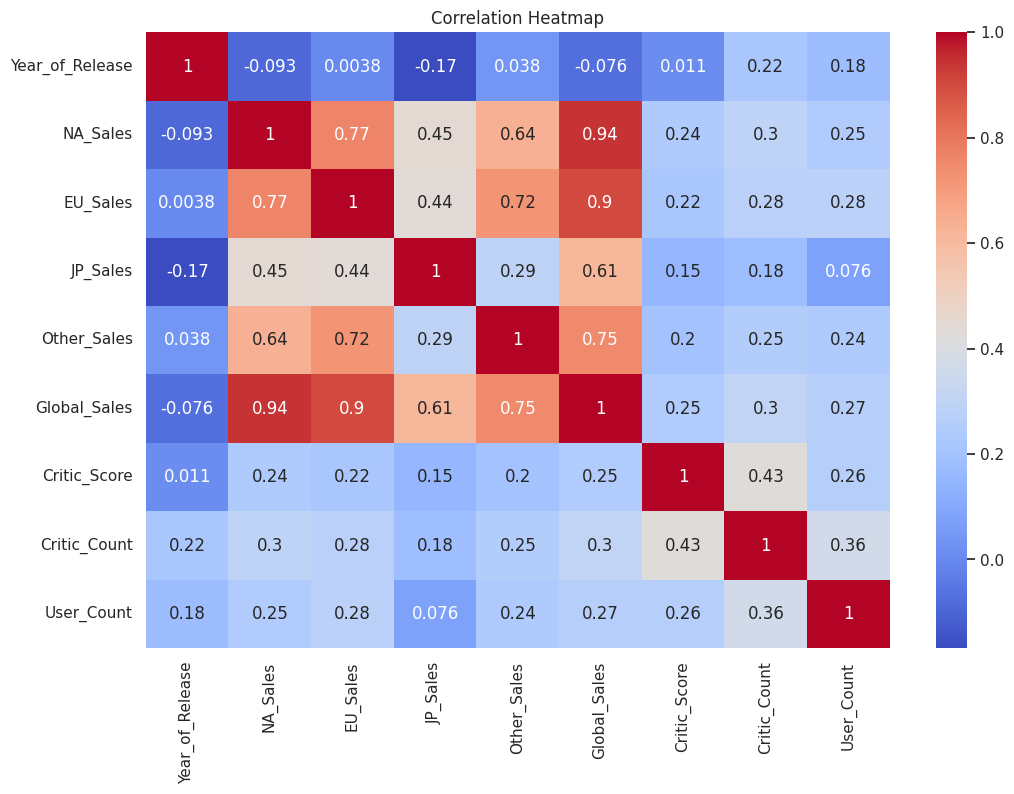

In [47]:
plt.figure(figsize=(12,8))
sns.heatmap(vgsales.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

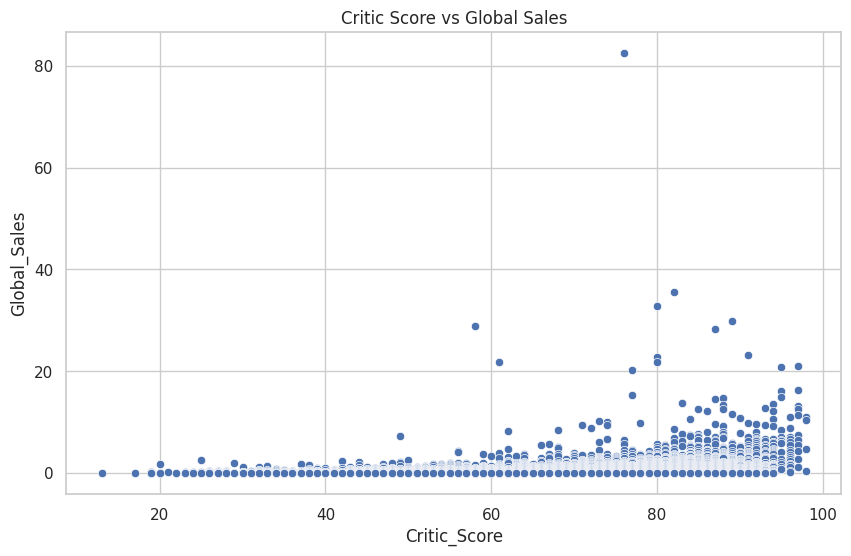

In [48]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=vgsales, x='Critic_Score', y='Global_Sales')
plt.title('Critic Score vs Global Sales')
plt.show()

## Data Cleaning

In this section, I will clean the dataset to prepare it for analysis. This includes:

- Duplicate rows that could skew results
- Missing values in critical columns
- Unreadable or wrongly formatted data (e.g., 'tbd' in `User_Score`)

Cleaning the data makes sure that the visualisations and comparisons are based on accurate and usable data.

### Create Copy

In [49]:
vgsales_clean = vgsales.copy()

**Why?**

 I create a copy of the dataset before making any changes. This is because it makes it easier to compare before and after cleaning. It also helps me have an unclean dataset that I can refer to if mistakes are made. This is a precautionary good practice (Ahmed, 2024b)


### Check for duplicates in the dataset

In [50]:
if vgsales_clean.duplicated().sum() > 0:
    print("Duplicate Rows Preview:")
    print(vgsales_clean[vgsales_clean.duplicated()].head())
else:
    print("No duplicate rows found.")

print(f'Number of duplicate rows: {vgsales_clean.duplicated().sum()}')


No duplicate rows found.
Number of duplicate rows: 0


**Why?**

I check for duplicates to make sure there aren't any in the dataset. Even though I didn’t find any here, it’s good to check because just one duplicate could mess up the results or make things look off in graphs (Ahmed, 2024b).

Duplicates can mess with stats or charts. If I do find duplicates, I check how many there are and look at a few to see what's repeated. Finding them is the first step before deciding whether to remove them (Ahmed, 2024b).

### Check for Missing Values

In [51]:
print('Missing values per column:')
print(vgsales_clean.isnull().sum())

Missing values per column:
Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64


**Why?**

I do this to make sure data gaps does NOT affect how my model works.

Missing data can mess up my model training and evaluation which would lead to wrong predictions. By checking how many values are missing in each coilumn, I can decide on the best way to handke them. I can do this by filling, dropping, or replacing so that the final dataset is complete and reliable.

Finding missing values is key to keeping the data quality high. Missing data can lower the quality, which impacts model performance. According to Ahmed (2025c), collecting good data and improving features are important for effective classification. Ahmed (2025d) also points out that reliable predictions need accurate data, and missing info can lead to unreliable results. That’s why I make sure to check and fix any missing values to keep my data consistent.

### Dataset Shape

In [52]:
print("Original shape of dataset:", vgsales.shape)

Original shape of dataset: (16719, 16)


**Why?**

Knowing the dataset's shape before cleaning helps track how much data is lost or retained during the cleaning steps. It’s important to document the impact of each operation (Ahmed, 2024b)

### Columns

#### Inspecting columns

In [53]:
print("\nUnique values per column:")
print(vgsales_clean.nunique())

print("\nPercentage of missing values:")
print((vgsales_clean.isnull().sum() / len(vgsales_clean)) * 100)


Unique values per column:
Name               11562
Platform              31
Year_of_Release       39
Genre                 12
Publisher            581
NA_Sales             402
EU_Sales             307
JP_Sales             244
Other_Sales          155
Global_Sales         629
Critic_Score          82
Critic_Count         106
User_Score            96
User_Count           888
Developer           1696
Rating                 8
dtype: int64

Percentage of missing values:
Name                0.011962
Platform            0.000000
Year_of_Release     1.608948
Genre               0.011962
Publisher           0.322986
NA_Sales            0.000000
EU_Sales            0.000000
JP_Sales            0.000000
Other_Sales         0.000000
Global_Sales        0.000000
Critic_Score       51.330821
Critic_Count       51.330821
User_Score         40.098092
User_Count         54.602548
Developer          39.613613
Rating             40.486871
dtype: float64


**Why?**

I looked at the number of unique values and how much data was missing in each column.

'Rating' had more than 40% missing data and only 8 unique values, so it wasn’t useful for analysis.

'Developer' also had about 39% missing data, but it’s needed to answer one of the project questions. So, I decided to keep 'Developer' and remove 'Rating' (Ahmed, 2024b)

#### Dropping irrelevant columns

In [54]:
vgsales_clean.drop(columns=['Rating'], inplace=True)

I dropped the 'Rating' column because it has over **40%** missing values and only has 8 unique values, so it's not useful for my analysis.

I don't need it for any of my assessment questions, like those related to sales or developer counts.

While the 'Developer' column also has a lot of missing data **~39%**, I kept it because one of the questions specifically asks for the most common developers, so it is needed for analysis (Ahmed, 2024b).


#### Fix 'tbd' and convert User_Scor to Numeric

In [55]:
vgsales_clean['User_Score'] = pd.to_numeric(vgsales_clean['User_Score'], errors='coerce')

**Why?**

I convert the `User_Score` column to numeric because `tbd` values are non-numeric and meaningless in statistical analysis.

Using `errors='coerce'` converts these into NaN. This helps me to handle them properly in the next step (Ahmed, 2024b).


#### Convert Columns to Proper Types

In [56]:
vgsales_clean['Year_of_Release'] = vgsales_clean['Year_of_Release'].astype('Int64')

**Why?**

I ensure that the `Year_of_Release` column is treated as an **integer** rather than **object** or **string**.

This conversion makes sure things are sorted properly and easily calculated later on (Ahmed, 2024b).


#### Cleaned Columns

In [58]:
print("Columns after cleaning:\n")
print(vgsales_clean.columns)

vgsales_clean.head()

Columns after cleaning:

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer'],
      dtype='object')


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN


**Why?**

After cleaning up the data — inspecting the columns for irrelevantness, dropping irrelevant columns, fixing 'tbd' and converting to numeric and other columns to protper types - I like to look at the final columns and look at a few rows. This makes sure the data is ready for analysis (Ahmed, 2024b)
